# Ejercicio de aprendizaje no supervisado 

In [ ]:
# integrantes:
# Anggie Julieth Dorado Gaviria 
# Elias Ernesto Campos Villa 
# Nelson Puentes Cortes
# Edinson Andres Mendez Lopez
# Andres Fernando Tobon Montoya 

In [33]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Cargamos el dataset y mostramos las 5 primeras filas
dataset = pd.read_csv("Mall_Customers.csv")
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [51]:
dataset.shape

(200, 5)

In [53]:
# Descripción de los datos
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [55]:
# Valores nulos 
dataset.isna().sum() 

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [57]:
## En este dataset podemos observar que no tenemos valores nulos 

In [59]:
# Elimina las filas con valores nulos 
dataset.dropna()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [61]:
# esto es para que lo tengamos en cuenta ya que como lo dije anteriormente este dataset no tiene valores nulos 

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

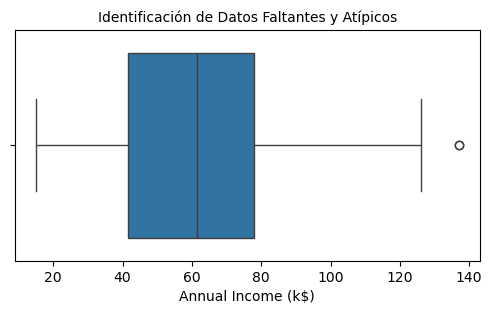

In [63]:
#Identificación de Datos Faltantes y Atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=dataset['Annual Income (k$)'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

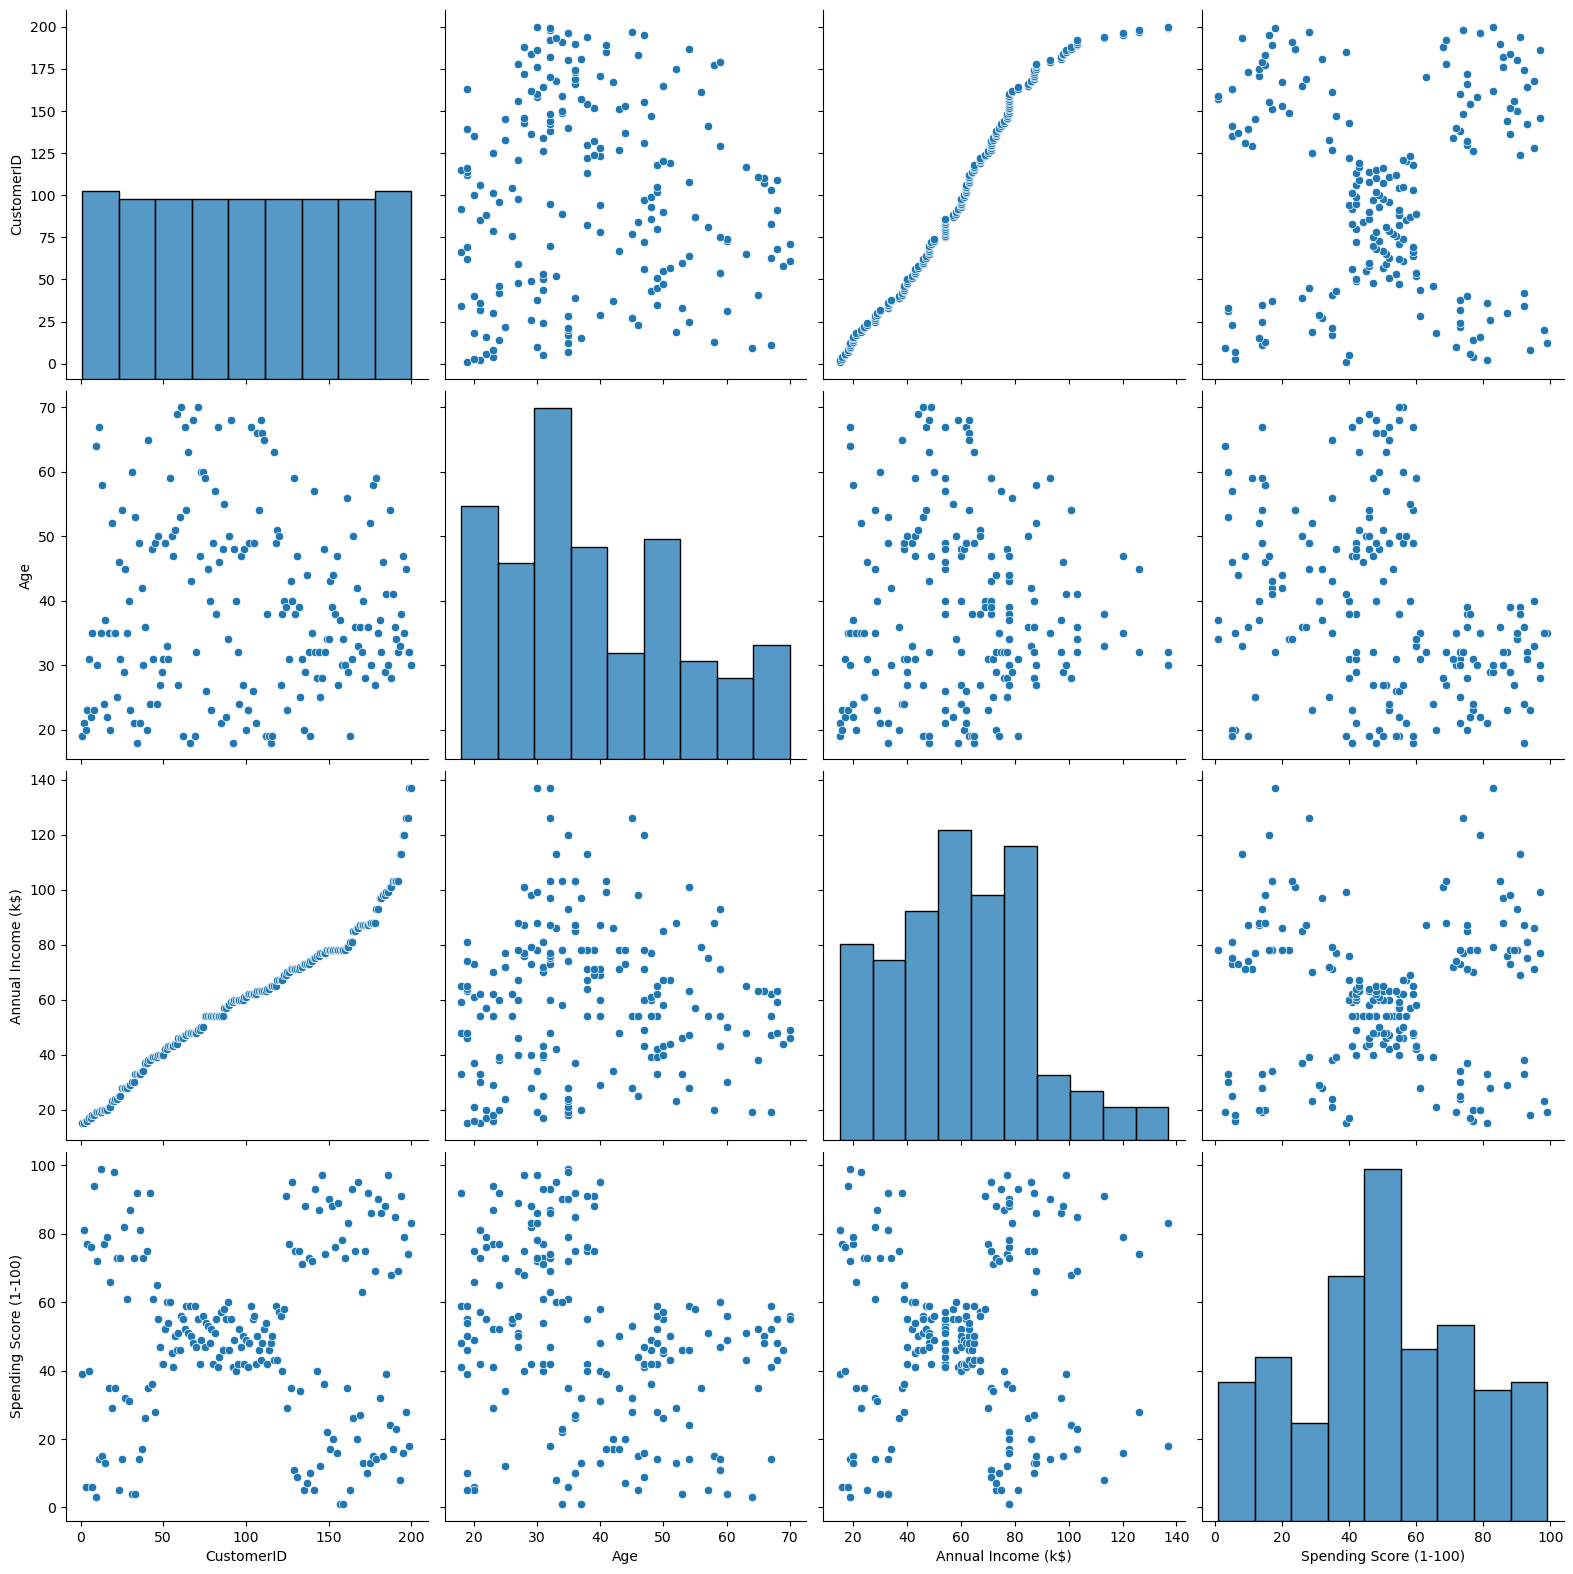

In [65]:
# Diagrama de dispercion para identificar correlaciones entre variables
sns.pairplot(dataset.dropna(), size=4,kind='scatter')

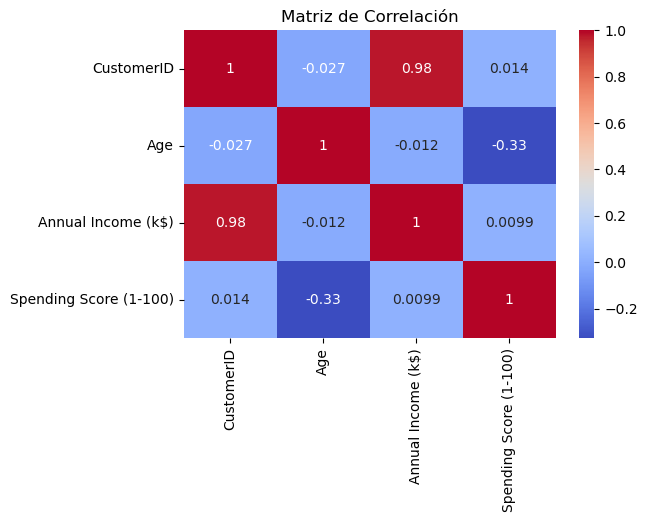

In [75]:
# Paso 8: Matriz de correlación
plt.figure(figsize=(6, 4))
sns.heatmap(dataset.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

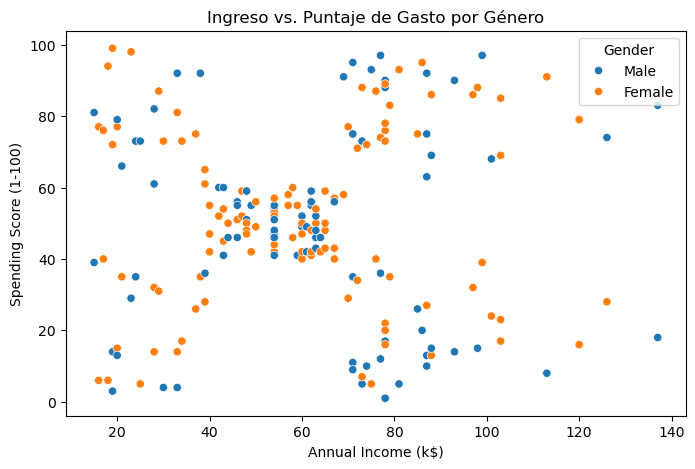

In [89]:
# Relación entre ingreso y gasto
plt.figure(figsize=(8,5))
sns.scatterplot(data=dataset, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.title('Ingreso vs. Puntaje de Gasto por Género')
plt.show()

In [87]:
print(dataset.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


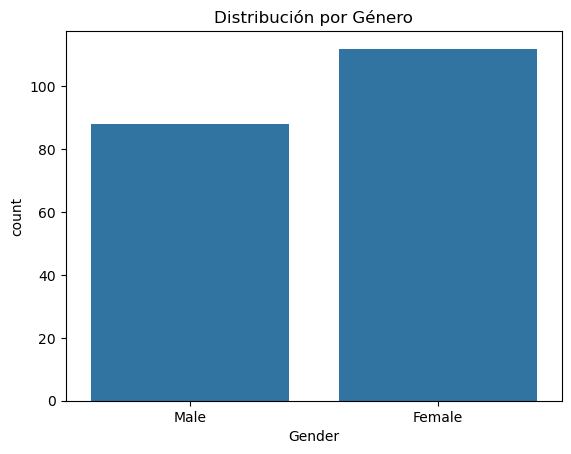

In [91]:
# Visualizar la distribución de variables categóricas
sns.countplot(data=dataset, x='Gender')
plt.title('Distribución por Género')
plt.show()

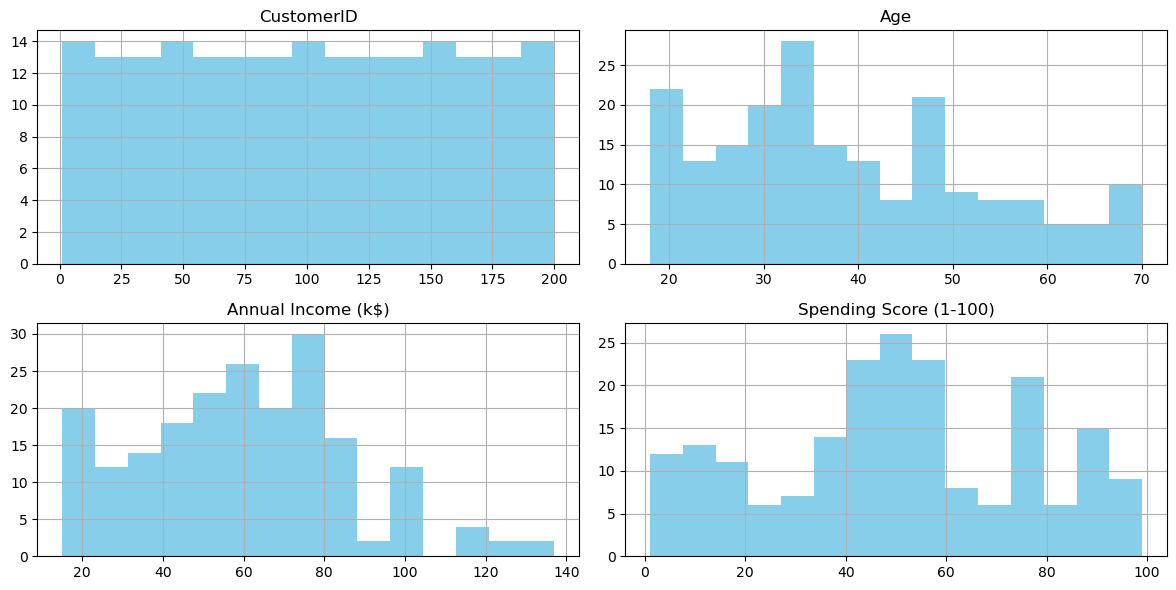

In [93]:
# Histogramas para variables numéricas
dataset.hist(bins=15, figsize=(12, 6), color='skyblue')
plt.tight_layout()
plt.show()

# 2 procesar los datos 

In [96]:
dataset = dataset.drop('CustomerID', axis=1)

In [100]:
# Codificación de la variable 'Gender' (Female=0, Male=1)
dataset['Gender'] = dataset['Gender'].map({'Female': 0, 'Male': 1})

In [102]:
# Revisamos las primeras filas del nuevo dataset 
dataset.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [104]:
# Normalizar los datos
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(dataset)

In [ ]:
## Se eliminaron columnas irrelevantes para el análisis (como CustomerID) y se transformó la variable categórica ‘Gender’ en valores numéricos para que pueda ser procesada por los modelos. Luego, se normalizaron las variables para asegurar que todas tengan el mismo peso al momento de aplicar los algoritmos de clustering.

In [ ]:
# 3 seleccion de caracteristicas 

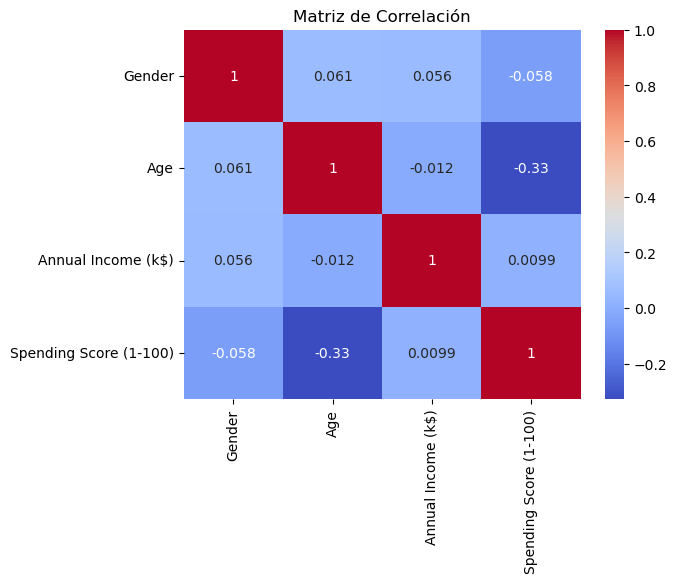

In [108]:
# Si estás usando dataset original (sin escalar)
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [12]:
# Crear un dataset reducido para clustering 
X = dataset[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [52]:
# Se evaluó la correlación entre las variables y se seleccionaron aquellas con mayor aporte para la segmentación de clientes. En este caso, se utilizaron las variables Annual Income (k$) y Spending Score (1-100) por su fuerte relación con el comportamiento de compra y su utilidad para una visualización clara de los clusters. También se preparó una versión normalizada del conjunto completo para pruebas más avanzadas.

# 4. Entrenar el modelo configurando los diferentes hiperparámetros.

In [164]:
# Dentro del grupo: suma de errores cuadráticos
wcss = [] 

In [166]:
# probar K desde 1 a 10 
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

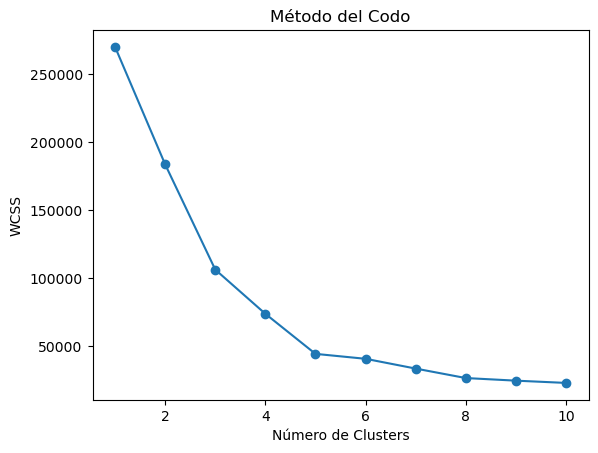

In [170]:
# Grafica del metodo del codo 
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

In [172]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

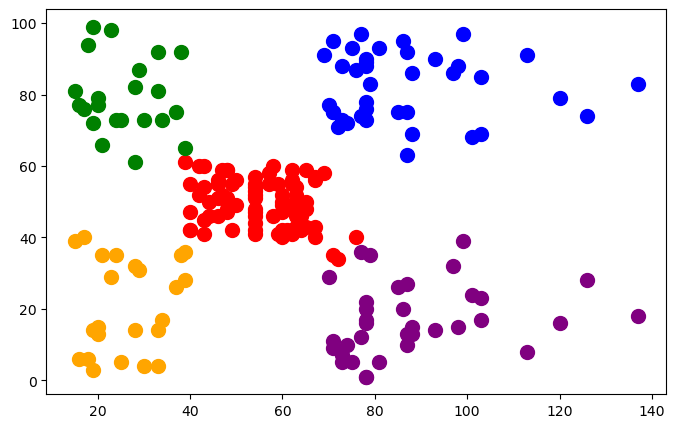

In [174]:
# X debe ser solo Ingreso y Score para esta gráfica
plt.figure(figsize=(8,5))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='purple', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='orange', label='Cluster 5')

In [ ]:
# El modelo logra una segmentación útil para estrategias de marketing personalizadas. Por ejemplo, se pueden diseñar promociones específicas para cada grupo según sus patrones de ingreso y gasto.

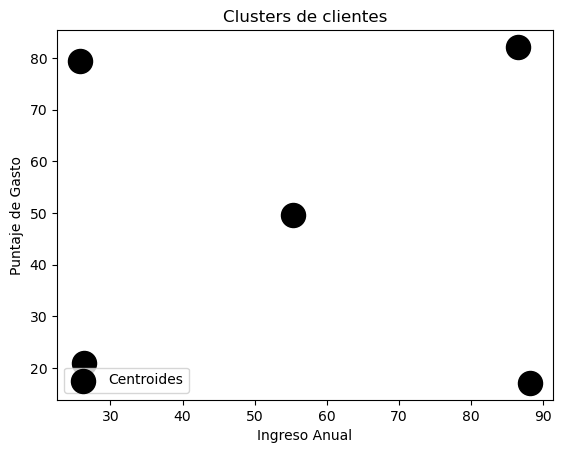

In [178]:
# Centros
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='black', label='Centroides')
plt.title('Clusters de clientes')
plt.xlabel('Ingreso Anual')
plt.ylabel('Puntaje de Gasto')
plt.legend()
plt.show()

In [ ]:
## Se utilizó el método del codo para determinar el número óptimo de clusters, identificando que 5 agrupaciones ofrecen un buen equilibrio entre precisión y simplicidad. Se entrenó el modelo K-means con estos 5 grupos, lo que permitió identificar patrones de comportamiento distintos entre los clientes, según su ingreso y nivel de gasto. Se visualizó cada cluster con sus respectivos centroides.

# 5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.

In [14]:
# Suponiendo que K óptimo es 5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
labels = kmeans.fit_predict(X)

In [16]:
# Métrica de Silhouette
sil_score = silhouette_score(X, labels)
print(f"Coeficiente de Silhouette: {sil_score:.3f}")


Coeficiente de Silhouette: 0.554


In [22]:
# Índice de Calinski-Harabasz
calinski_score = calinski_harabasz_score(X, labels)
print(f"Índice de Calinski-Harabasz: {calinski_score:.3f}")

Índice de Calinski-Harabasz: 247.359


In [ ]:
#1. Coeficiente de Silhouette (0.554):
#	•	Este valor indica qué tan bien están definidos los clusters.
#	•	Valores cercanos a 1 indican una buena separación entre clusters y que los puntos están bien agrupados.
#	•	Un valor de 0.554 es moderadamente bueno, lo que sugiere que los clusters están bien separados pero podría haber algo de solapamiento entre #algunos grupos.

#2. Índice de Calinski-Harabasz (247.359):
#	•	Esta métrica evalúa la densidad y separación de los clusters.
#	•	Cuanto más alto, mejor es la calidad del agrupamiento.
#	•	Un valor de 247.359 indica que los clusters están razonablemente bien separados y compactos. Es una buena señal del desempeño del modelo.

# 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

In [25]:
# Crear el modelo con K=5 
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

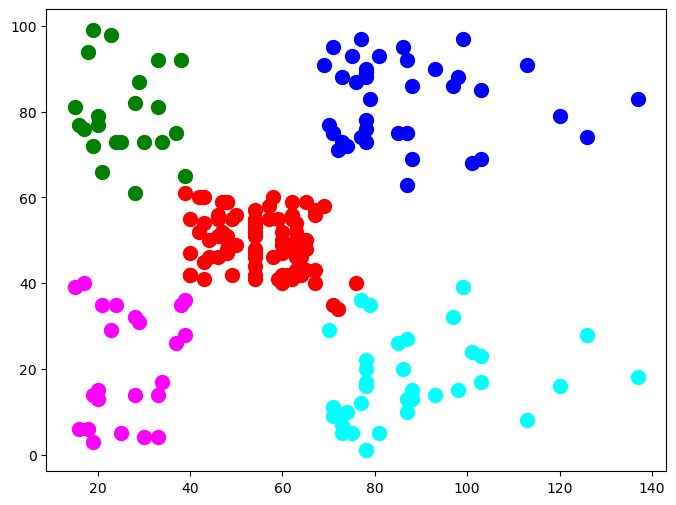

In [27]:
# Gráfico con los clusters
plt.figure(figsize=(8,6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')

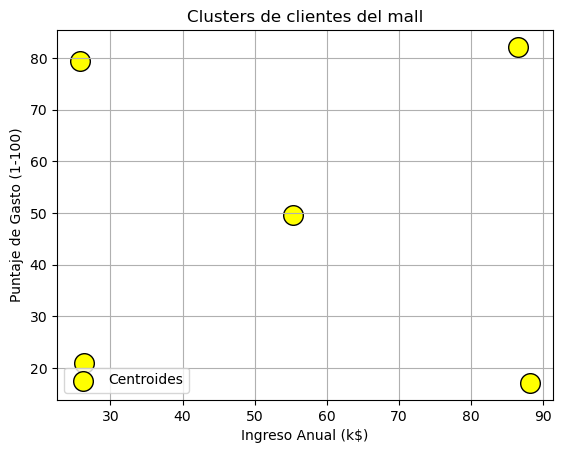

In [29]:
# Centros de los clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
s=200, c='yellow', label='Centroides', edgecolors='black')
plt.title('Clusters de clientes del mall')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# En la gráfica se observan los centroides de los cinco clústeres identificados. Cada punto amarillo representa el centro de un grupo de clientes, #según su Ingreso Anual (k$) y su Puntaje de Gasto (1–100). Estos centroides nos permiten interpretar comportamientos típicos dentro de cada grupo:
#	1.	Clientes con bajo ingreso y bajo gasto:
#	•	Bajo poder adquisitivo y poco interés en gastar.
#	•	Es posible que no sean un público objetivo prioritario.
#	2.	Clientes con alto ingreso y bajo gasto:
#	•	Aunque tienen capacidad económica, no gastan mucho.
#	•	Podrían representar una oportunidad para estrategias de marketing.
#	3.	Clientes con ingreso medio y gasto medio:
#	•	Perfil promedio, comportamiento equilibrado.
#	•	Pueden representar la mayoría de los clientes.
#	4.	Clientes con bajo ingreso y alto gasto:
#	•	Gastan mucho pese a tener ingresos bajos.
#	•	Posible foco para promociones o fidelización.
#	5.	Clientes con alto ingreso y alto gasto:
#	•	Segmento más rentable.
#	•	Ideal para programas de fidelización VIP o productos premium.

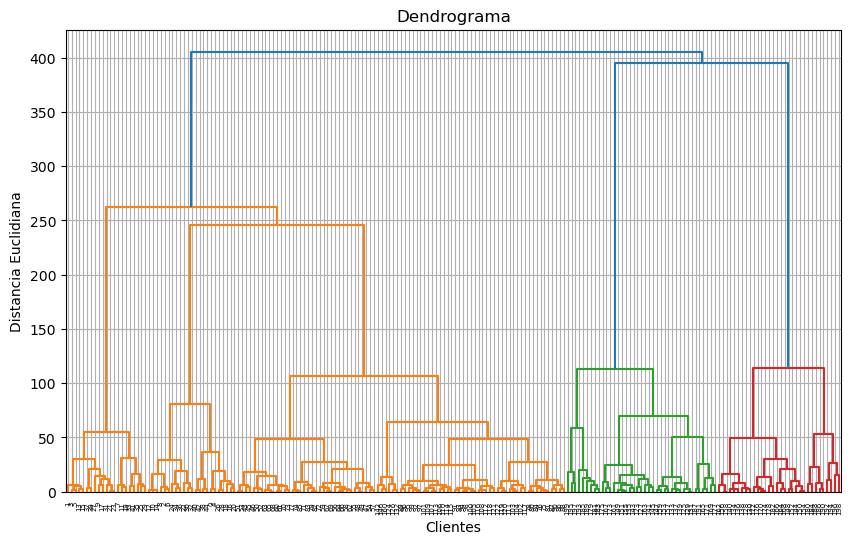

In [35]:
# parte 1: Dendrograma 
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distancia Euclidiana')
plt.grid(True)
plt.show()

In [39]:
# Parte 2: Modelo de cloustering jerarquico
# Creamos el modelo jerárquico con 5 clusters 
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
y_hc = hc.fit_predict(X)

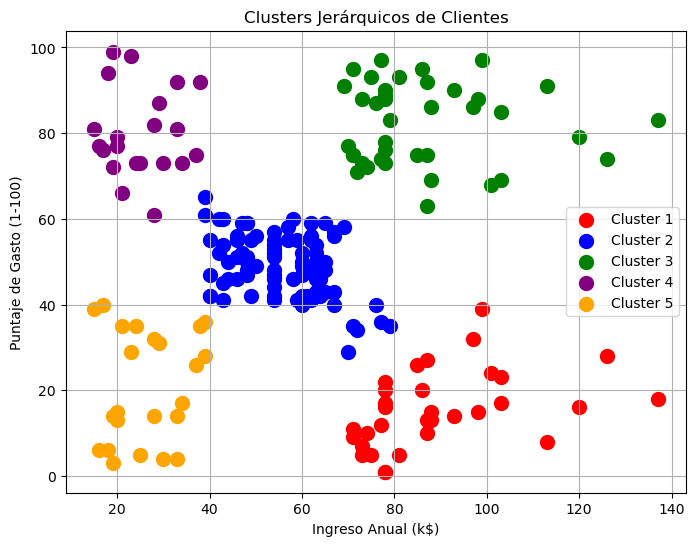

In [41]:
# Visualización
plt.figure(figsize=(8,6))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s=100, c='purple', label='Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s=100, c='orange', label='Cluster 5')

plt.title('Clusters Jerárquicos de Clientes')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 1.	Segmentación clara de los clientes del mall:
#   •	El gráfico representa 5 grupos de clientes distintos (clusters) basados en su ingreso anual (eje X) y su puntaje de gasto (eje Y).
# 2.	Interpretación de cada grupo:
#   •	Cluster 1 (rojo): Ingresos altos pero bajo puntaje de gasto.
#   •	Cluster 2 (azul): Ingresos medios y puntaje de gasto medio.
#	•	Cluster 3 (verde): Ingresos altos y alto puntaje de gasto (clientes ideales para el negocio).
#	•	Cluster 4 (morado): Ingresos bajos pero alto puntaje de gasto (pueden ser compradores impulsivos).
#	•	Cluster 5 (naranja): Ingresos bajos y bajo puntaje de gasto (clientes menos rentables).
# 3.	Aplicación del análisis:
#	•	Esta segmentación es útil para diseñar estrategias de marketing personalizadas, como promociones, fidelización o reorientación de esfuerzos #hacia los clientes más rentables.
